# Total Cases, Deaths and Recovery of/from COVID-19

In [14]:
import pandas as pd
import os


# reading the csv file
data = pd.read_csv('Data/covid_19_clean_complete.csv')

# summing the columns
cases = data['Confirmed'].sum()
deaths = data['Deaths'].sum()
recovered = data['Recovered'].sum()

# percentage of recovery and fatalities
perc_recover = (recovered / cases) * 100
perc_fatal = (deaths / cases) * 100

# printing the results
print(f'\nTotal cases of COVID-19: {cases}')
print(f'Total deaths from COVID-19: {deaths} ({perc_fatal:.2f}% of total cases)')
print(f'Total recoveries from COVID-19: {recovered} ({perc_recover:.2f}% of total cases)\n')



Total cases of COVID-19: 828508482
Total deaths from COVID-19: 43384903 (5.24% of total cases)
Total recoveries from COVID-19: 388408229 (46.88% of total cases)



# 5 Most Contaminated Countries

In [16]:
# importing another .csv file
data2 = pd.read_csv('Data/worldometer_data.csv')

# creating lists
cases = data2['TotalCases'].tolist()
countries = data2['Country/Region'].tolist()

# creating a dictionary
dt = pd.DataFrame({
    'Total Cases' : cases,
    'Countries' : countries   
})

# grouping the columns
group = dt.groupby('Countries')['Total Cases'].sum().reset_index().set_index('Countries')

# printing the result
print(group.sort_values('Total Cases', ascending = False).head(5))

              Total Cases
Countries                
USA               5032179
Brazil            2917562
India             2025409
Russia             871894
South Africa       538184


# 5 Countries With the Most Fatalities

In [11]:
# creating a list for fatalities and countries
deaths2 = data2['TotalDeaths'].tolist()

# creating a dictionary
dt2 = pd.DataFrame({
    'Total Deaths' : deaths2,
    'Countries' : countries
})

# grouping the columns
group2 = dt2.groupby('Countries')['Total Deaths'].sum().reset_index().set_index('Countries')

# printing
print(group2.sort_values('Total Deaths', ascending = False).head(5))

           Total Deaths
Countries              
USA            162804.0
Brazil          98644.0
Mexico          50517.0
UK              46413.0
India           41638.0


# Coutries With Most Infected per 1M

In [55]:
# list for total population
population = data2['Population'].tolist()

# creating a new list to divided the number of cases by 1M
list_rates = [(a/b) * 1000000 for a, b in zip(cases, population)]

# creating a dictionary for coutnries and the rate
dt3 = pd.DataFrame({
    'Countries' : countries,
    'Rate of Infection per 1M' : list_rates
})

# printing the results including a round() funcion to give me the rounded numbers intead of decimal ones
print(dt3.round().sort_values('Rate of Infection per 1M', ascending = False).head(10).set_index('Countries'))

               Rate of Infection per 1M
Countries                              
Qatar                           39922.0
French Guiana                   27146.0
Bahrain                         25130.0
San Marino                      20596.0
Chile                           19165.0
Panama                          16527.0
Kuwait                          16378.0
Oman                            15769.0
USA                             15194.0
Vatican City                    14981.0


# Data From Brazil

In [5]:
# getting the data for Brazil only
brazil = data2[data2['Country/Region'].str.contains('Brazil')]

# deleting unwanted columns
brazil = brazil.drop(columns = ['Continent', 'NewRecovered', 'Tot Cases/1M pop', 'Deaths/1M pop', 'NewDeaths', 'NewCases', 'WHO Region', 'Tests/1M pop', 'TotalTests', 'ActiveCases', 'Serious,Critical'])

# printing the results
print(brazil)

# percentage of the population infected
# storing the values in variables
population_br = brazil['Population']
cases_br = brazil['TotalCases']

# calculating and printing the percentage of infected
perc_cases_br = (cases_br / population_br) * 100
print(f'\nPercentage of the population infected: {perc_cases_br.values[0]:.3f}%') # using .values[0] to show only the wanted number. It stores the variable in a list and than shows the first one ([0]). Done that because the code was showing the number aproximation and the variable type (float64)

# storing the total deaths from Brazil
deaths_br = brazil['TotalDeaths']

# calculating and printing the percentage of deaths
perc_deaths_br = (deaths_br / cases_br) * 100
print(f'Percentage of fatalities: {perc_deaths_br.values[0]:.3f}%')

  Country/Region   Population  TotalCases  TotalDeaths  TotalRecovered
1         Brazil  212710692.0     2917562      98644.0       2047660.0

Percentage of the population infected: 1.372%
Percentage of fatalities: 3.381%


# Graph of Brazil Daily Infections

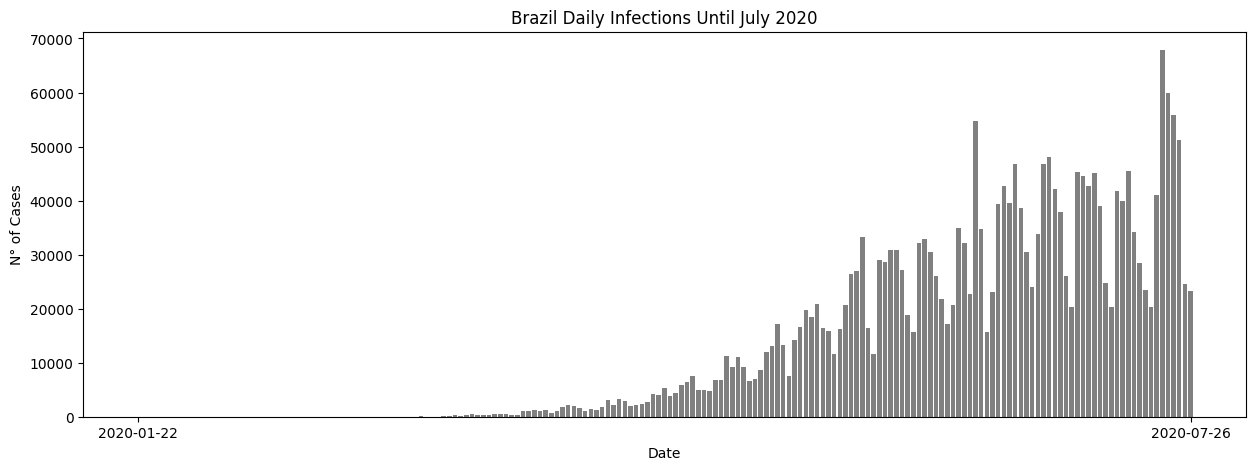

In [5]:
import matplotlib.pyplot as plt


# geting Brazil information
brazil_daily = data[data['Country/Region'].str.contains('Brazil')]

# storing the cases in a list
cases_list_br = brazil_daily['Confirmed'].tolist()

# subtracting the values to find only the daily infections
cases_list_br = [y - x for x, y in zip(cases_list_br, cases_list_br[1:])]

# removing the last element of the 'Date' column so it does not interfere with the plot
dates_br = brazil_daily['Date'].tolist()  #creating a list with the dates
dates_br = dates_br[:-1] # removing the last element of the list
 
plt.figure(figsize = (15,5))
# creating a bar graph
plt.bar(dates_br, cases_list_br, color = 'grey') #using the created list to plot the graph

# setting the x axis labels
plt.xticks([dates_br[0], dates_br[-1]], visible = True) 

# labelling the axes
plt.xlabel('Date')
plt.ylabel('N° of Cases')

# graph title
plt.title('Brazil Daily Infections Until July 2020')

# showing the graph
plt.show()
